# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [5]:
#seu código aqui
X_test = pd.read_csv("X_test_2.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced_2.csv", delimiter=',')
y_test = pd.read_csv("y_test_2.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced_2.csv", delimiter=',')

In [8]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,2
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1
...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,2
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,0
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,0
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,1


In [10]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [16]:
contagem_classes = y_test.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
Churn
0.0      19649
1.0       5278
Name: count, dtype: int64


In [18]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,0
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,0
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,1
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,0
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,0
...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,2
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,2
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,1
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,1


In [20]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


In [22]:
contagem_classes = y_train.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
Churn
0.0      58975
1.0      58975
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

In [24]:
#Sua resposta aqui

Escolher o critério que será feito a árvore, fazer as previsões, checar a acurácia, precisão, recall e f1-score, fazer a matriz de confusão, depois disso, aplicar a árvore em si, checar a importância das características, para depois tentar melhorar o modelo de acordo com as características que são mais importantes para as previsões.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [30]:
#seu código aqui
arvore_churn = DecisionTreeClassifier (criterion = 'gini', random_state = 0)

arvore_churn.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
print(arvore_churn.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [39]:
#seu código aqui
previsoes = arvore_churn.predict(X_test[:10])
previsoes

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [41]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [43]:
previsoes = arvore_churn.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.789986761343122


In [47]:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     19649
         1.0       0.50      0.56      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.79     24927



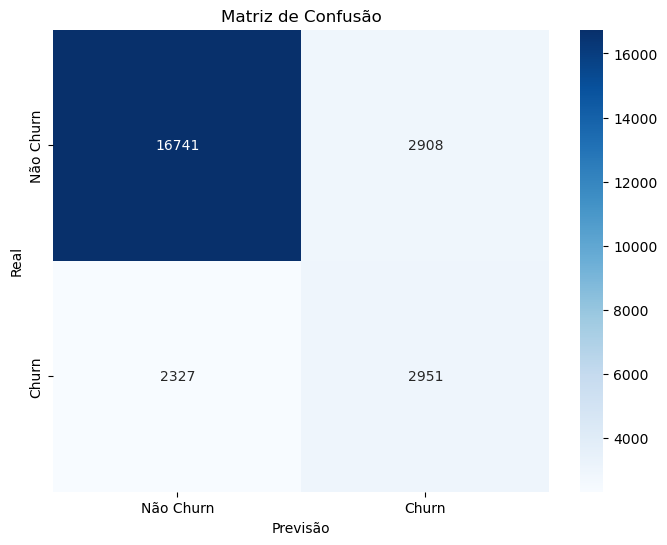

In [49]:
matriz_confusao = confusion_matrix(y_test, previsoes)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

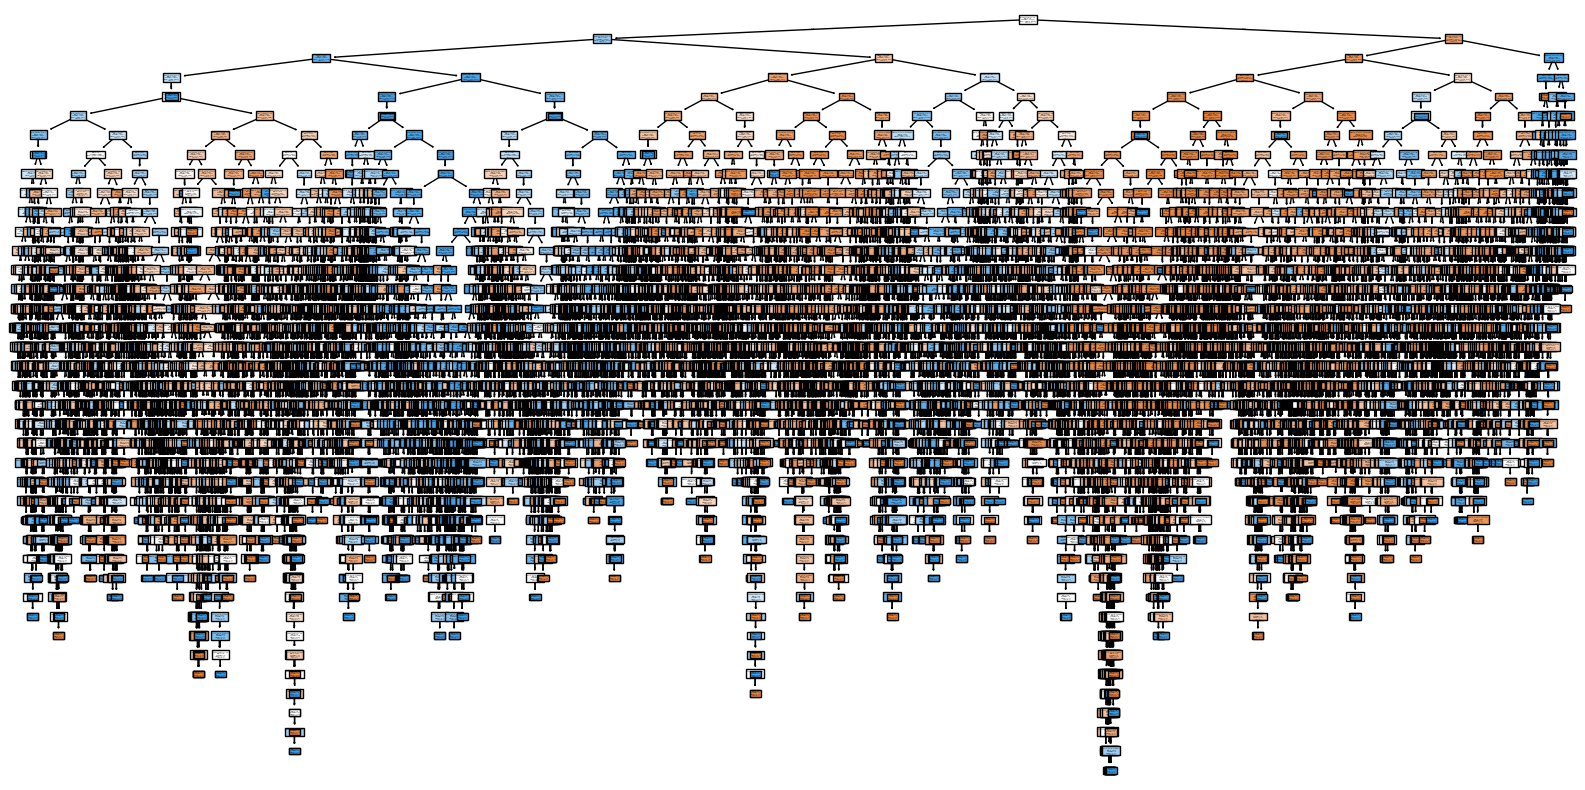

In [51]:
#seu código aqui
plt.figure(figsize=(20,10))
plot_tree(arvore_churn, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

A avaliação visual é de que é uma árvore de profundidade extremamente grande, por esse motivo se torna difícil uma avaliação visual.

# 6) Identifique as 2 principais features do modelo.


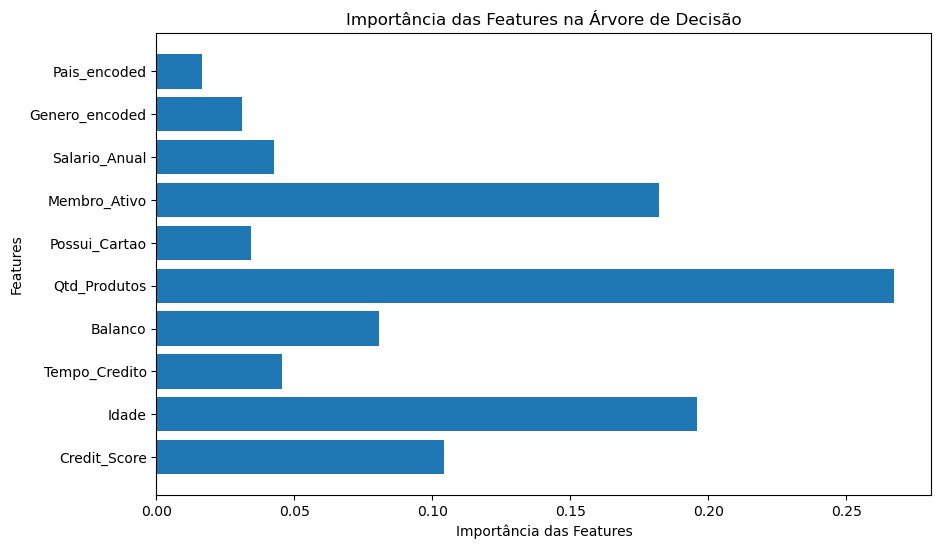

In [57]:
#seu código aqui
importancias_features = arvore_churn.feature_importances_

nomes_features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

As duas features de maior importância são a quantidade de produtos e a idade.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [62]:
#seu código aqui
X_train_reduzido = X_train[['Qtd_Produtos', 'Membro_Ativo', 'Idade']]
X_test_reduzido = X_test[['Qtd_Produtos', 'Membro_Ativo', 'Idade']]

In [64]:
arvore_churn_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_churn_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [66]:
previsoes_reduzido = arvore_churn_reduzido.predict(X_test_reduzido)

In [68]:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     19649
         1.0       0.74      0.48      0.59      5278

    accuracy                           0.85     24927
   macro avg       0.81      0.72      0.75     24927
weighted avg       0.84      0.85      0.84     24927



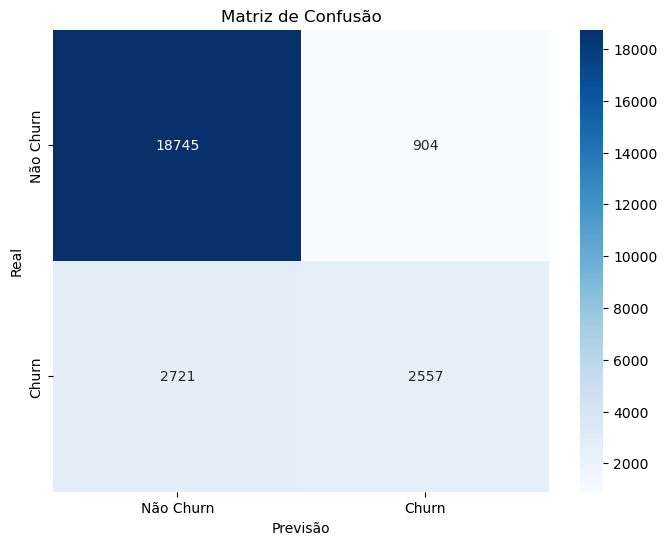

In [70]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

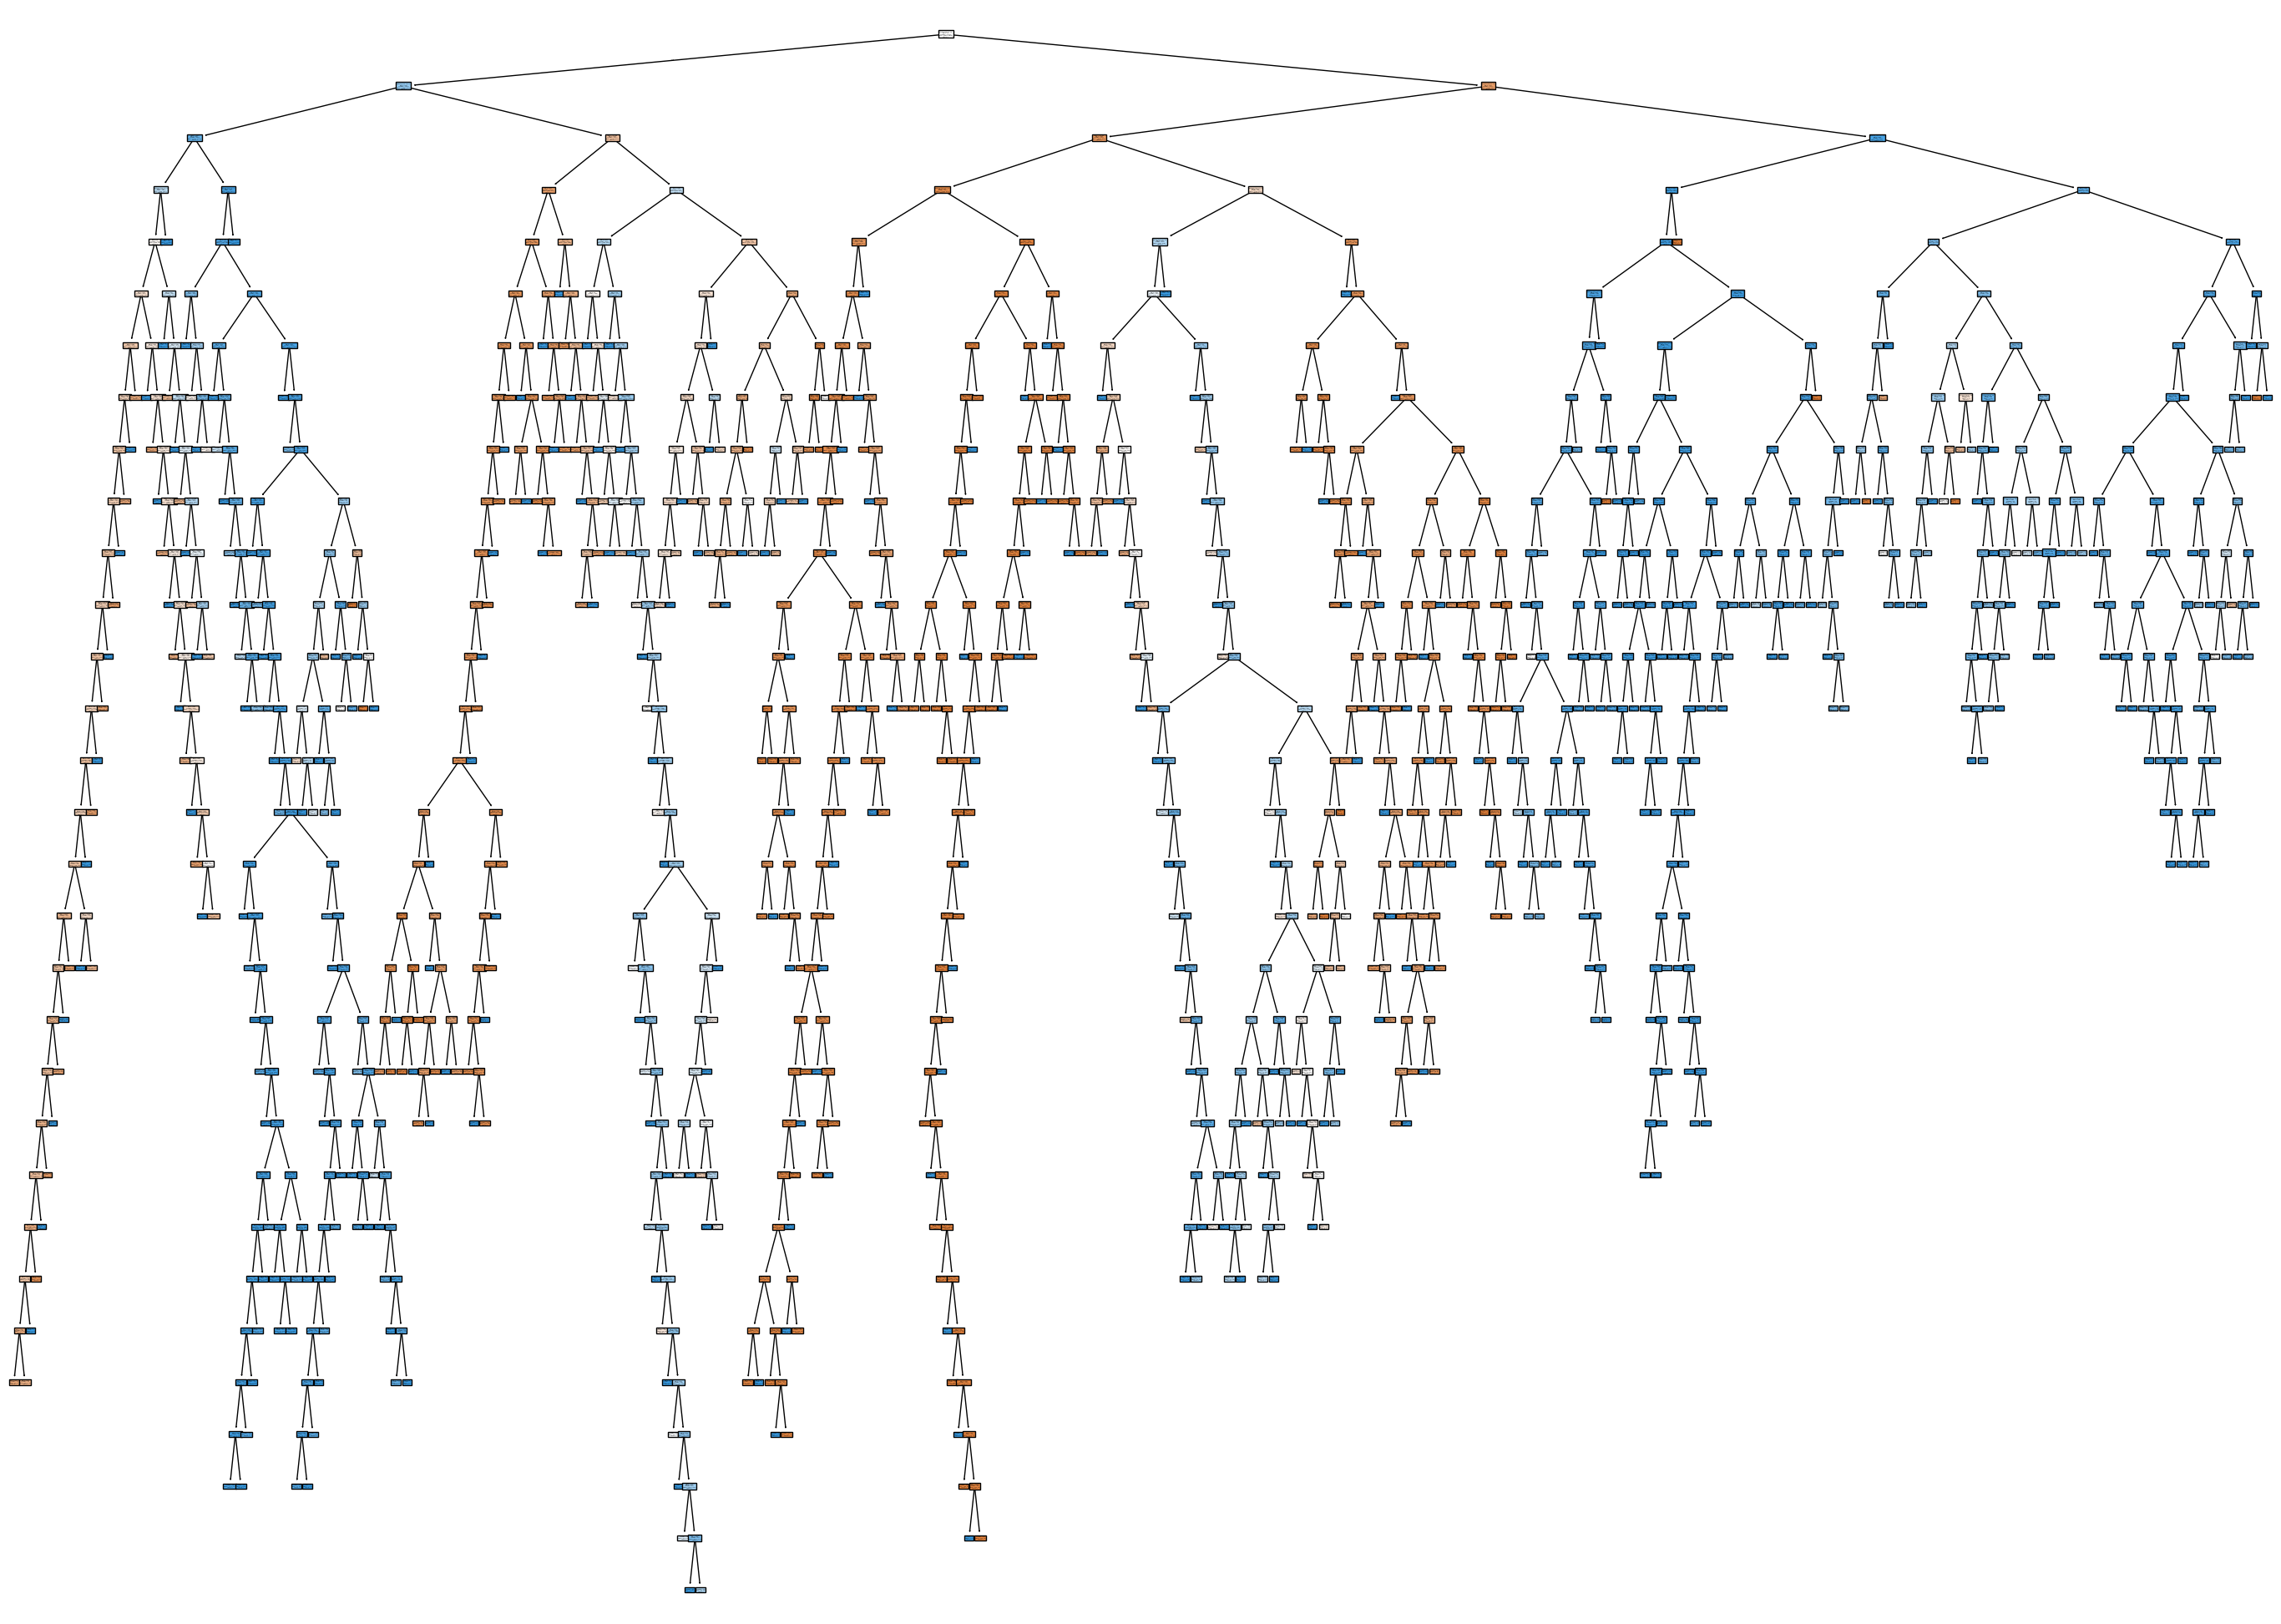

In [72]:
plt.figure(figsize=(35,25))
plot_tree(arvore_churn_reduzido, filled=True, feature_names=X_train_reduzido.columns, class_names=['0', '1'])
plt.show()

Em alguns dos quesitos o modelo está melhor que o anterior, porém, ele piorou no dado mais importante, que é o de churn, fazendo com que o recall descesse para menos de 0.50.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [75]:
#Seu texto aqui

Para mim, essa pergunta ficou confusa porque o que era pra ser feito no módulo de Naive Bayes era prever o score de crédito, e aqui era para prever o churn ou não churn, o que torna difícil a comparação, mas sendo assim: O modelo que melhor se adequou aos dados e teve os melhores resultados foi o naive bayes, o que pode sim ter ocorrido pelo fato de terem muito menos dados. Ele conseguiu uma acurácia e recall de 1.0, o que foi perfeito, então não tinha como ser melhor que isso. Mas, creio eu que buscando prever a mesma variável, a árvore de decisão teria um resultado melhor, até pelo fato de conseguir encontrar quais foram as características mais importantes para a previsão, o que, trabalhando ela direito, é essencial para melhores resultados de previsão, coisa que o naive bayes não tem.